In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def castFloat(str):
    return float(str.replace(',','.'))

In [3]:
# Read a file and push the elements into a list
def fileToList(fileName):
    list = []
    try:
        file = open(fileName)
        for line in file:
            list.append(castFloat(line))
        file.close()
    except IOError:
        errorMsg = fileName + ' could not be opened!'
        print(errorMsg)
    return list

In [4]:
# Compute the average of a list elements
def average(list):
    list.sort()
    # Remove all missing values
    while 0 in list:
        list.remove(0)
    # Validation of list size
    if len(list) == 0: return 0
    if len(list) > 2:
        del list[0]
        del list[len(list)-1]
    # computing the average
    sum = 0
    size = 0
    for number in list:
        if number > 0:
            sum += number
            size += 1
    return sum/size

In [5]:
# Compute the armonic mean of a list elements
def mean(list):
    list.sort()
    # Remove all missing values
    while 0 in list:
        list.remove(0)
    # Validation of list size
    if len(list) == 0: return 0
    if len(list) > 2:
        del list[0]
        del list[len(list)-1]
    # computing the mean
    sum = 0
    for number in list:
        sum += 1/number
#     return list[0]
#     return list[len(list)-1]
#     return (list[0] + list[len(list)-1]) / 2
    return len(list)/sum

In [6]:
# Process a set of files
def processTest(testFiles):
    data = []
    statistics = []
    for testFile in testFiles:
        data.append(fileToList(testFile))
    for j in range(len(data[0])):
        tuple = []
        for i in range(len(data)):
            tuple.append(data[i][j])
        statistics.append(average(tuple))
    return statistics

In [7]:
# Group elements in list
def toBuckets(data, bucketSize):
    i = 0
    sum = 0
    bucketList = []
    for element in data:
        sum += element
        i+=1
        if i == bucketSize:
            bucketList.append(sum/i)
            i = 0
            sum = 0
    return bucketList

In [8]:
# Print elements of list
def printList(data):
    for element in data:
        if element != 0:
            print(str(element).replace('.',','))
        else:
            print('null')

In [9]:
# This method summarizes the 10 execution of a test
def processTest(startTest, endTest, variation, nrCasesXVar, orderByValidG = False):
    completeData = []
    difs = 0
    # Append nrCasesXVar empty lists
    for i in range(nrCasesXVar):
        completeData.append([])
    # Store the averages of the cases
    for currentTest in range(startTest, endTest):
        for i in range(nrCasesXVar):
            pathTime = 'TESTS/TEST %d/%d/%s.time'%(currentTest, i+1, variation)
            pathSize = 'TESTS/TEST %d/%d/%s.size'%(currentTest, i+1, variation)
            avg = average(fileToList(pathTime))
            validG = average(fileToList(pathSize))
            # If order by valid groups
            if orderByValidG: 
                # Limit of tuples in set
                if validG > 0:# and len(completeData[int(validG)-1]) < 50:
                    completeData[int(validG)-1].append(avg)
            # Default order
            else: completeData[i].append(avg)
    # Computing the statistics for every case
    statistics = []
    for tuple in completeData:
#         print('---->', len(tuple))
        statistics.append(average(tuple))
            
#     print(completeData)
#     print(statistics)
#     print(difs)
    return statistics
    
startTest = 1
endTest = 61
# processTest(startTest,endTest,'VarDividend','fts_all', 10)

In [10]:
bucketSize = 1
wantToPlot = True

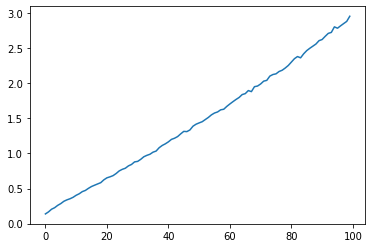

In [12]:
result = processTest(1, 2, "INTERSECT", 100)
result = toBuckets(result, bucketSize)

if wantToPlot:
    plt.plot(result)
else:
    printList(result)

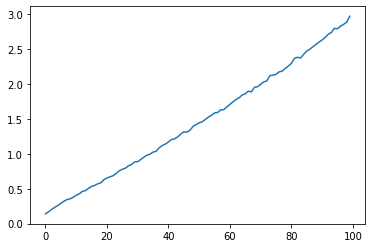

In [13]:
result = processTest(1, 2, "MINUS", 100)
result = toBuckets(result, bucketSize)

if wantToPlot:
    plt.plot(result)
else:
    printList(result)

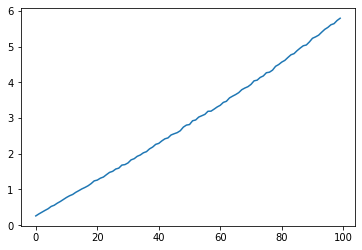

In [15]:
result = processTest(2, 3, "INTERSECT", 100)
result = toBuckets(result, bucketSize)

if wantToPlot:
    plt.plot(result)
else:
    printList(result)

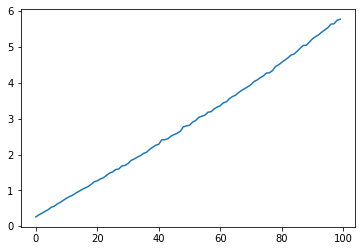

In [16]:
result = processTest(2, 3, "MINUS", 100)
result = toBuckets(result, bucketSize)

if wantToPlot:
    plt.plot(result)
else:
    printList(result)

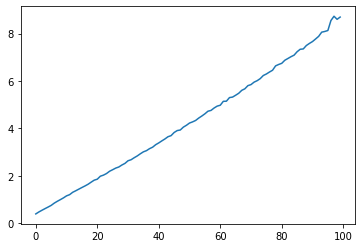

In [18]:
result = processTest(3, 4, "INTERSECT", 100)
result = toBuckets(result, bucketSize)

if wantToPlot:
    plt.plot(result)
else:
    printList(result)

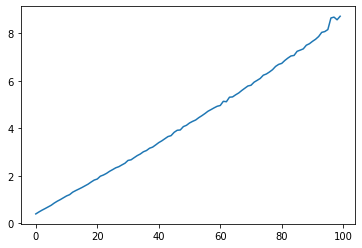

In [19]:
result = processTest(3, 4, "MINUS", 100)
result = toBuckets(result, bucketSize)

if wantToPlot:
    plt.plot(result)
else:
    printList(result)

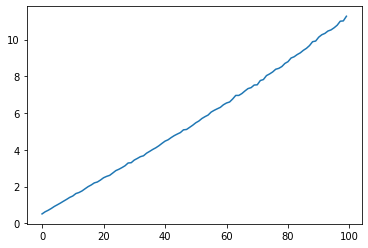

In [21]:
result = processTest(4, 5, "INTERSECT", 100)
result = toBuckets(result, bucketSize)

if wantToPlot:
    plt.plot(result)
else:
    printList(result)

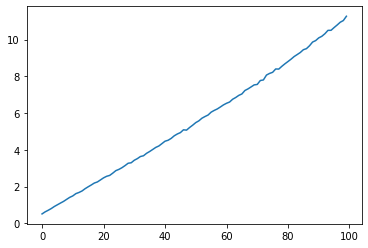

In [22]:
result = processTest(4, 5, "MINUS", 100)
result = toBuckets(result, bucketSize)

if wantToPlot:
    plt.plot(result)
else:
    printList(result)